# Influence des conditions atmosphériques sur la concentration en masse d'un polluant

La concentration en masse $C$ d'un polluant exprimée en $µg/m^3$ dépend de la masse molaire $M$ du gaz ($g/mol$),
de la pression atmosphérique $P$ ($hPa$) et de la température $T$ ($°C$).

$C = \frac{0,1 P . M}{8,314510 (T + 273,15)} ppm$

In [2]:
def ppm_to_mass(ppm, temperature, pressure, molar_mass):
    '''
    Computes the mass concentration of a given gas based on
    https://www.lenntech.com/calculators/ppm/converter-parts-per-million.htm

    Parameters:
        ppm (float): parts per million.
        temperature (float): expressed in °C.
        pressure (float): expressed in hPa.
        molar_mass (float): molar mass of the gas expressed in g/mol.

    Returns:
        concentration (float): expressed in µg/m3.       
    '''

    return ppm / (8.314510 * (temperature + 273.15) / (pressure * 0.1 * molar_mass))

## Influence de la pression atmosphérique

<AxesSubplot:xlabel='Pression (hPa)'>

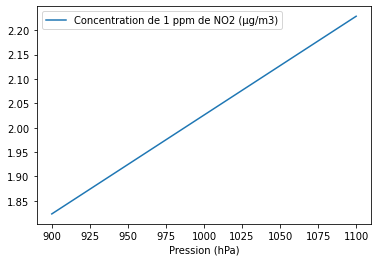

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

c = []
for p in range(900, 1101, 10):
    c.append(ppm_to_mass(1, 0, p, 46.01))

df = pd.DataFrame(data={'Pression (hPa)': range(900, 1101, 10), 'Concentration de 1 ppm de NO2 (µg/m3)': c})

df.plot(x='Pression (hPa)', y='Concentration de 1 ppm de NO2 (µg/m3)')

## Influence de la température

<AxesSubplot:xlabel='Température (°C)'>

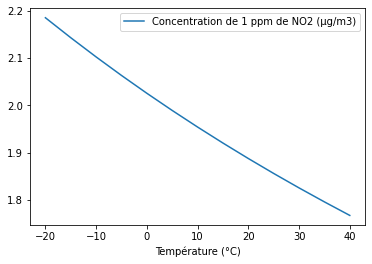

In [6]:
c = []
for t in range(-20, 41, 5):
    c.append(ppm_to_mass(1, t, 1000, 46.01))

df = pd.DataFrame(data={'Température (°C)': range(-20, 41, 5), 'Concentration de 1 ppm de NO2 (µg/m3)': c})

df.plot(x='Température (°C)', y='Concentration de 1 ppm de NO2 (µg/m3)')